# extract $m_A$ from run-1 data On-Off beam with $Q^2$-dependent correction

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/mA_extraction/'

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [4]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
non-collinearity first,90.4%,45.3%,94.8%,15.4%,"$|\theta_{1,2}-90^0|<60^0$",90.4% (3446),42.7% (1707),10.9% (2462),94.8% (1170)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)


# a demonstration of how to calculated purity and effiency for a given cut as a function of $Q^2$

In [5]:
bins = np.linspace(0,0.8,16)

In [15]:
def get_pur_eff_Q2_for_cut(bins = np.linspace(0,1.5,20),cut_name = 'PIDa'):

    mup_original = reduced_MCbnbDATAcosmicSamples['no cut']['1mu-1p']
    Q2_pairs_original = mup_original['reco_Q2']
    h_mup_original,bins = np.histogram( Q2_pairs_original , bins=bins )
    h_mup_original = np.array([np.max([h_mup_original[i],1]) for i in range(len(h_mup_original))])
        
    h = dict()
    for pair_type,label,color in zip(pair_types,MClabels,MCcolors):
        pairs = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        Q2_pairs = pairs['reco_Q2']
        histo,bins = np.histogram( Q2_pairs , bins=bins )
        histo = np.array([np.max([histo[i],1]) for i in range(len(histo))])
        h[pair_type] = (np.array(histo)).astype(np.float)
        
    
    eff_mup = h['1mu-1p']/h_mup_original
    eff_mup = np.array([np.max([0.01,eff_mup[i]]) for i in range(len(eff_mup))])
    eff_mup_err = eff_mup*np.sqrt( 1./h['1mu-1p'] + 1./h_mup_original )
    
    pur_mup = h['1mu-1p']/(h['1mu-1p'] + h['other pairs'] + h['cosmic'])
    pur_mup = np.array([np.max([0.001,pur_mup[i]]) for i in range(len(pur_mup))])
    pur_mup_err = pur_mup*np.sqrt( 1./h['1mu-1p'] + 1./(h['1mu-1p'] + h['other pairs'] + h['cosmic']) )
    
    Q2 = bins[:-1]
    return Q2 , eff_mup , eff_mup_err , pur_mup , pur_mup_err

In [16]:
bins = np.linspace(0,0.8,16)
cuts = ['no cut','vertex activity','soft Pt'] 
cuts_labels = ['no cuts',r'detector cuts',r'kinematical cuts']
eff_mup = dict()
eff_mup_err = dict()
pur_mup = dict()
pur_mup_err = dict()
pur_over_eff_mup = dict()
pur_over_eff_mup_err = dict()

for cut_name in cuts:    
    Q2, eff, eff_err, pur, pur_err = get_pur_eff_Q2_for_cut(bins=bins,cut_name=cut_name)
    eff_mup[cut_name] = eff
    eff_mup_err[cut_name] = eff_err
    pur_mup[cut_name] = pur
    pur_mup_err[cut_name] = pur_err
    pur_over_eff_mup[cut_name] = pur/eff
    pur_over_eff_mup_err[cut_name] = pur_over_eff_mup[cut_name]*np.sqrt( np.square(eff_err/eff) + np.square(pur_err/pur) )

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [10]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [11]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


In [12]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

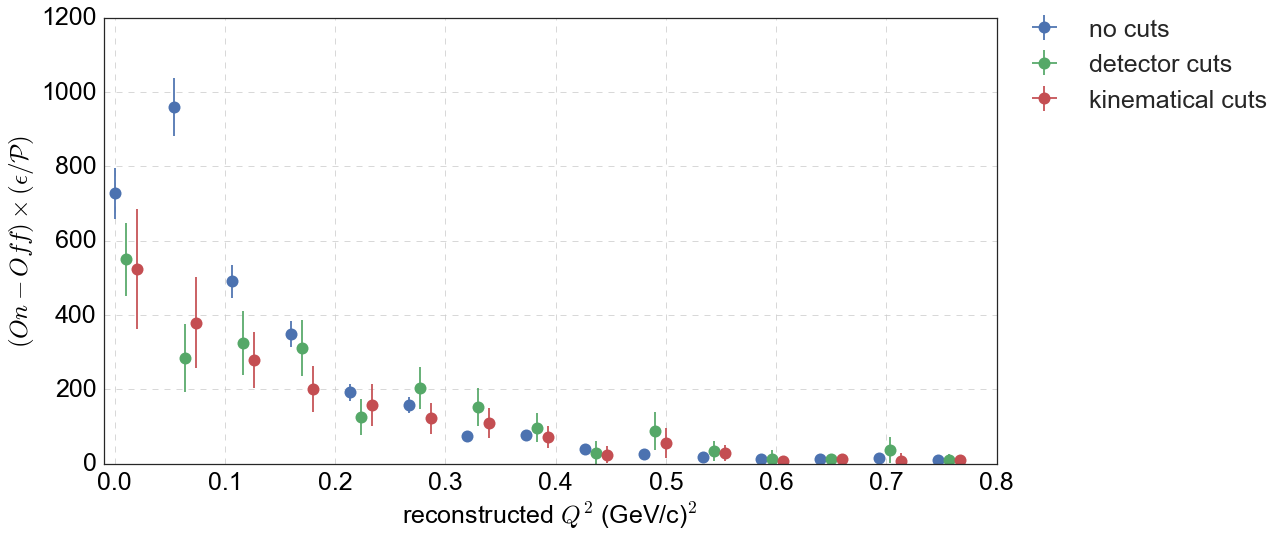

In [14]:
h_OnOff_corrected = dict()
h_OnOff_corrected_err = dict()

for cut_name in ['no cut','vertex activity','soft Pt']:
    
    OnBeamSample = reduced_OnBeam[cut_name]
    OffBeamSample = reduced_OffBeam[cut_name]
    
    h_OnBeam,edges = np.histogram( OnBeamSample['reco_Q2'] , bins=bins )
    h_OnBeam_err = np.sqrt(h_OnBeam)
    h_OffBeam,edges = np.histogram( OffBeamSample['reco_Q2'] , bins=bins )
    h_OffBeam_err = np.sqrt(h_OffBeam)
    
    h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
    h_OnBeam_minus_OffBeam_err = np.sqrt( np.abs(h_OnBeam + OffBeam_scaling*OffBeam_scaling*h_OffBeam) )

    h_OnOff_corrected[cut_name] = h_OnBeam_minus_OffBeam*pur_over_eff_mup[cut_name]
    h_OnOff_corrected_err[cut_name] = np.sqrt( np.square(h_OnBeam_minus_OffBeam_err*pur_over_eff_mup[cut_name]) 
                                              + np.square(h_OnBeam_minus_OffBeam*pur_over_eff_mup_err[cut_name]) )
    
fig,ax = plt.subplots(figsize=(16,8))
for i_cut,(cut_name,cut_label) in enumerate(zip(['no cut','vertex activity','soft Pt']                             
                                                ,['no cuts','detector cuts','kinematical cuts'])):
    plt.errorbar( x = Q2+0.01*i_cut, xerr=0, markersize=12
                 , y=h_OnOff_corrected[cut_name] , yerr=h_OnOff_corrected_err[cut_name]
                 , fmt='o', label=cut_label)
ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)        
set_axes(ax,r'reconstructed $Q^2$ (GeV/c)$^2$',r'$(On-Off) \times (\epsilon / \mathcal{P}) $'
         ,xlim=(-0.01,0.8)
         ,ylim=(-1,1200)
         ,do_add_grid=True)
# plt.savefig(figures_path+'Q2corrected_mup.pdf',bbox_inches='tight')